## Analyze A/B Test Results[Hessa Alqahtani]




## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

>We have 294478 columns and 5 rows.

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1')['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

>To find the proportion i used query to select the rows i want and calculate it by the numbers of unique users who converted divided by the total of unique users. As shown above, The proportion of users converted is 12%.

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
number1=len(df[df['group'] == 'treatment'][df['landing_page'] == 'old_page'])
number2=len(df[df['group'] == 'control'][df['landing_page'] == 'new_page'])
number1+number2

<ipython-input-6-6d6d95703b21>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  number1=len(df[df['group'] == 'treatment'][df['landing_page'] == 'old_page'])
<ipython-input-6-6d6d95703b21>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  number2=len(df[df['group'] == 'control'][df['landing_page'] == 'new_page'])


3893

>I calculate the total numbers for the new_page and treatment when they don't match. It supposed to be treatment for new page and control for the old page.

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

>As shown above, The data does not have any missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.drop(df.query('group == "control" & landing_page != "old_page"|group == "treatment" & landing_page != "new_page"').index)

>Here I run the code without the "index" in the end and it keeps shown errors until i found out to access the rows you needs to use the “index”./ I droped the rows where the landing_page and group columns didn't match.

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'].duplicated().sum()

1

In [12]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.drop(df2[df2['user_id'].duplicated()].index)

> I dropped it because We shouldn't be counting the same user more than once.

In [15]:
df2.duplicated().sum()

0

> To check if the duplicated dropped properly.

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2['converted'][df2['group'] == 'control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2['converted'][df2['group'] == 'treatment'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
(df2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


- First,The probability for the person no matter which group he belongs to is : 11.9%.
- Second,The probability of converted in control group is: 12.03%.
- Third, The probability of converted in treatment group is: 11.8%.\
Finally, From the points above, There is no suffient evidence to say that the (new/old) page will leads to more conversions. Because the results for the probaibilty is so close to each other. I can't decide which page will leads to more conversions. That's why we will use A/B test to help us decide.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} \geq  p_{new}$$

$$H_1: p_{old} < p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.001030675427312458

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted=np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old])
    p_diffrence=new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diffrence)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

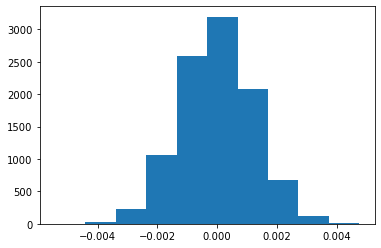

In [28]:
plt.hist(p_diffs);

> As expected, it was a normal distrbution curve. After i find out the mean in p_diffs is 0 i expect the curve to be normal disturbution where mean=median=mode"the tallest bar =0". As shown above the tallest bar is 0 = mean.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

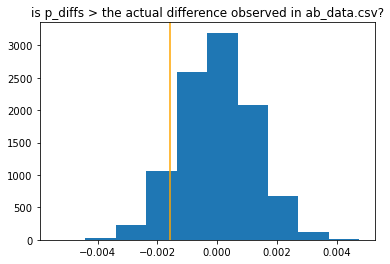

In [29]:
dif1=df2['converted'][df2['group'] == 'control'].mean()
dif2=df2['converted'][df2['group'] == 'treatment'].mean()
obs_diff=dif2-dif1
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.title("is p_diffs > the actual difference observed in ab_data.csv?")
plt.axvline(obs_diff,color='orange');

In [30]:
(p_diffs >= obs_diff).mean()

0.9041

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- After computed proportion for the observed difference and P(old/new) difference. We can see clearly p_diff is greater than obs_diff.
- In scientific studies this value called **p-value**.
- The meaning of p-value: if $H_0$ is true, The probabilty of obatining the observed statistic or one more extreme in favor of the alternative hypothsess.
- Here the p-value=0.9076, Which is bigger than the type I error(0.5). So we fail to reject the  $H_0$, because our p-value is large we shouldn't move away from the null hypothesess. Which means we will stick to the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
#convert_old/new for the individuals who (received/didn't recived )the page.
convert_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
convert_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])
#n_old/new the number of rows associated with the old/new pages.
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

<ipython-input-31-0891d6fbe86d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
<ipython-input-31-0891d6fbe86d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

> ztest:(count, nobs, value=None, alternative='two-sided', prop_var=False)
>- Count: The number of successes for each sample.
>- Nobs: The number of observations, with the same length as count.
>- Value: Optional in the test. 
>- Alternative:The alternative hypothesis can be either two-sided or one of the one- sided tests. Smaller(p1<p2) or larger(p1 > p2). Where p1 is the proportion of the first sample and p2 of the second one.
>- Prop_varince:If prop_var is false, then the variance of the proportion estimate is calculated based on the sample proportion.

- In our alternative, If i compare the convert_new(p1) with convert_old(p2) we can see the first sample(p1) is smaller.

In [32]:
counts=[convert_old,convert_new]
nobs=[n_old,n_new]
z_score,p_value=sm.stats.proportions_ztest(counts,nobs, value=None, alternative='smaller', prop_var=False)
(z_score,p_value)

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The z-scores and p-values can tell us here whether you can reject that null hypothesis or not, The p-value is the probabilty and the Z-scores are standard deviations. We can see that p-value is larger than the z-score which suggests that converstions from the old page are better than the new. They agree with the finding in **j(p-value=0.9)** and **k(we will stick to the old page)**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Logistc Regression; because we need to predict between categorical response 0 and 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        04:17:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The p-value here is 0.190 for the ab_page. The reason it is diffrent from the p-value(0.9)we calculated before is because the Logistc Regression is based on a two-tailed test. The p-value here is still bigger than the type I error(0.190>0.05). So we still fail to reject the null hypothesis.

The hypothsess in part II:
$$H_0: p_{old} \geq  p_{new}$$

$$H_1: p_{old} < p_{new}$$
and our hypothesess now is:
$$H_o: p_{old} = p_{new}$$

$$H_1: p_{old} \neq  P_{new}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>There are many factors may effect our results. If we do not consider them,we can't be sure about the results. Some of the factors:
> - Change aversion:existing users may give an unfair advantage to the old page.Because they don't like changes.
> - Novelty effect: existing users may give  an unfair advantage to the new page, because they are so excited and happy with the changes.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
country_df = pd.read_csv('./countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
country_df = pd.read_csv('./countries.csv')
df3 = country_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,treatment
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [38]:
df3[['ca', 'uk', 'us']] = pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,treatment,ca,uk,us
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1,0


In [39]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'uk', 'us']])
result2 = lm.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:               1.521e-05
Time:                        04:17:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
us             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

>Does it appear that country had an impact on conversion?
>> The p-value's for (uk-us-ca"intercept") as shown above is bigger than our type I error(0.05), so again we fail to reject the null hypothesis. So Country doesn't effect the conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
df3['us_page'] = df3['us'] * df3['ab_page']
df3['uk_page'] = df3['uk'] * df3['ab_page']
df3.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,treatment,ca,uk,us,us_page,uk_page
user_id,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1,0,0,1


In [41]:
lm = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'us', 'uk', 'us_page', 'uk_page']])
result3 = lm.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        04:17:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
us             0.0175      0.038      0.465      0.642      -0.056       0.091
uk             0.0118      0.040      0.296      0.767      -0.066       0.090
us_page        0.0469      0.054      0.872      0.383      -0.059       0.152
uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

> In conclusion, we can see that all the varibles above are not statistically significant. Even after we look at an interaction between page and country to see if there significant effects on conversion. And there isn't. We fail to reject the null so e-commerce website needs to stick to the old page.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1